<a href="https://colab.research.google.com/github/Gnome101/MAT_421/blob/main/Module_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19 Root Finding


## Root Finding Problem Statement
Root or zero of a function is an x where f(x) = 0
It can be difficult to dermeine an analytic or exact solution for the roots of some functions


In [21]:
#Imports
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
#Change plot stlye
plt.style.use('seaborn-poster')

<ipython-input-21-5f17614203af>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [30]:
f = lambda x: 8 * np.sin(x) - x**3
r = optimize.fsolve(f,-2)
print("Sci-py found best x is :", r,)
print(0 == 8 * np.sin(r[0]) - r[0]**3)
#Sci-py optimize is able to find the root of a function


Sci-py found best x is : [-1.95116847]
True


## 19.2 Tolerance
Tolerance is the level of error acceptable for an engineering application
|f(x)| is one way to measure the error from a root

|$x_{i + 1} - x_i$| is another way that basically assumes that the improvements between guesses will diminish

## 19.3 Bisection Method

Intermediate Value Theorem - if f(x) is continuous function between a and b
and sign(f(a)) $\neq$ sign(f(b)) then there must be a c such that a < c < b and f(c) = 0  

The bisection method uses teh IVT to find roots.It essentially finds a and b which are two values above and below 0. Then it uses a binar search esque algorithim to find a root.

In [32]:
def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        # If the solution is acceptable return it
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # The result is closer to the a side
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # The result is closer to the b side
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In [62]:
#First we define a function
f = lambda x: x**4 - x**2 - np.cos(x)

r1 = my_bisection(f, 0, 2, 1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.1)
print("r01 =", r01)
r001 = my_bisection(f, 0, 2, 0.01)
print("r001 =", r001)
r0001 = my_bisection(f, 0, 2, 0.001)
print("r0001 =", r0001)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))
print("f(r001) =", f(r001))
print("f(r0001) =", f(r0001))

r1 = 1.0
r01 = 1.125
r001 = 1.14453125
r0001 = 1.14599609375
f(r1) = -0.5403023058681398
f(r01) = -0.0949948761736662
f(r001) = -0.007451095921305273
f(r0001) = -0.0006704255624092048


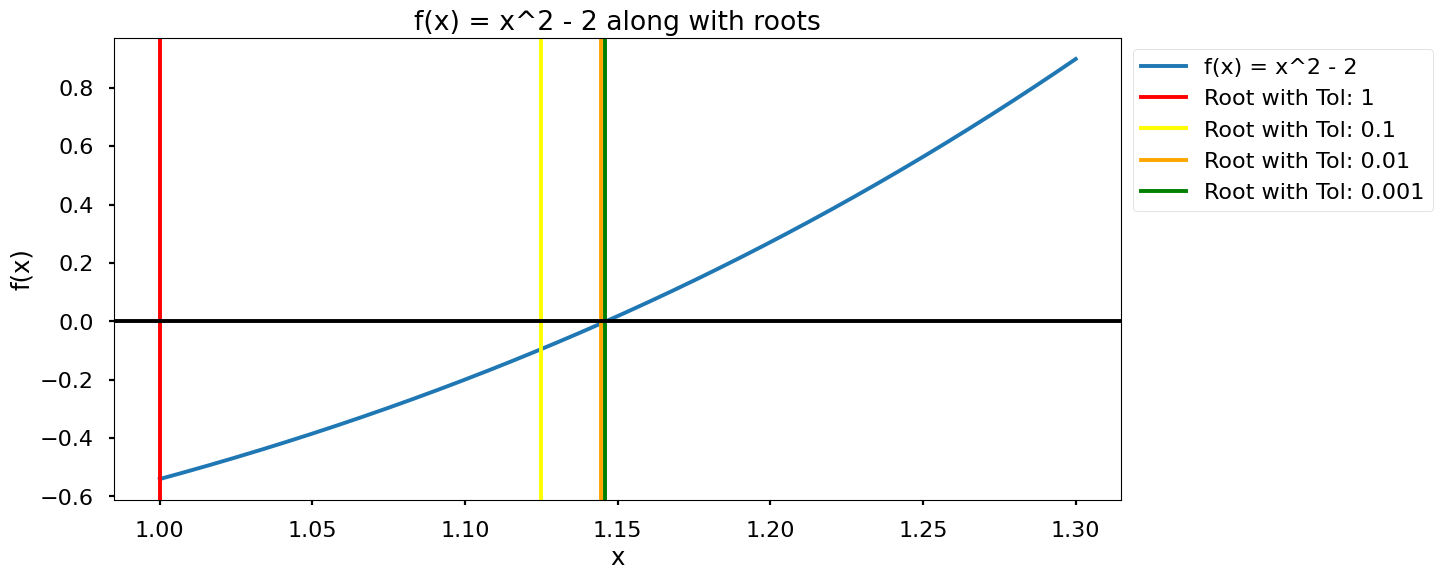

In [69]:
x = np.linspace(1, 1.3, 400)
y = f(x)
plt.figure(figsize=(13, 6))
plt.plot(x, y, label='f(x) = x^2 - 2')

plt.axvline(r1,label='Root with Tol: 1', color = "red")
plt.axvline(r01,label='Root with Tol: 0.1', color = "yellow")
plt.axvline(r001,label='Root with Tol: 0.01', color = "orange")
plt.axvline(r0001,label='Root with Tol: 0.001', color = "g")

plt.axhline(0,color = "black")
plt.title('f(x) = x^2 - 2 along with roots')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#This plot also shows how the roots get closer and closer

## 19.4 Newton-Raphson Method
This method makes a random guess about the root of a function. Then it uses the linear approximation around that guess to get closer to the root. This approximation uses the first derivative of the function. Everytime the function gets closer it has a Newton Step.


In [70]:
def my_newton(f, df, x0, tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [92]:
#Define a function
f = lambda x: x**4 - 100*x**2 -x + 100
#Define a derivative
df = lambda x: 4 * x**3 - 200*x -1

a = my_newton(f,df,0,0.01)
f(a)


0.006385860676147104

## 19.5 Root Finding in Python
Python has existing built in root-finding functions from scipy.optimize.
These are built in and allow one to find the roots of any function within a range


In [97]:
f = lambda x: x**4 - 100*x**2 -x + 100
optimize.fsolve(f,[2,80])

array([0.99999993, 9.95446066])

## Root Finding Speed Test
The following tests will compare the speeds of the following methods


In [118]:
import time
#First we will define a complex function
f = lambda x: np.sin(x) * 10 * x**4 - 100 * x**2
#Next we define a derivative
df = lambda x: 40*x**3*np.sin(x) + 10*x**4*np.cos(x) - 200*x



start_time = time.time()
my_newton(f,df,0,0.1)
end_time = time.time()
print("Newton-Raphson Time:", end_time - start_time, "seconds")

start_time = time.time()
my_bisection(f,0,10,0.1)
end_time = time.time()
print("Bisection time:", end_time - start_time, "seconds")

start_time = time.time()
a = optimize.fsolve(f,[0,10])
end_time = time.time()
print("Scipy time:", end_time - start_time, "seconds")
# While the fastest method is the Newton-Raphson one, its instability makes it
# difficult to use especially because of the recurison which can reach a max
# depth

Newton-Raphson Time: 0.00010848045349121094 seconds
Bisection time: 0.0003414154052734375 seconds
Scipy time: 0.00043773651123046875 seconds
